# 1A.soft - Notions de SQL

Premiers pas avec le langage [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Le langage SQL est utilisé pour manipuler des [bases de données](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es). Pour faire simple, on utilise les bases de données pour accéder rapidement à une information dans des données qui font parfois plusieurs milliards de lignes.

* Le tableau dont on se sert est trop grand (comme trier 50000 lignes).
* On souhaite faire des opérations sur deux feuilles Excel (associer les lignes de l'une avec celles de l'autre).

Lorsque le volume de données est important, il est impossible de les voir dans leur ensemble. On peut en voir soit une partie soit une aggrégation. Par exemple, la société qui gère les vélib a ouvert l'accès à ses données. Il est possible de télécharger aussi souvent qu'on veut (toutes les minutes par exemple) un état complet des vélos et places disponibles pour toutes les stations de Paris : c'est une table qui s'enrichit de 1300 lignes toutes les minutes.

## Récupérer les donnée

In [2]:
from pyensae import download_data
download_data("td8_velib.zip", website = 'xd')

['stations.txt', '.\\td8_velib.txt']

On crée une base de données [sqlite3](https://www.sqlite.org/). On peut la consulter avec un outil tel que [SqliteSpy](https://www.yunqa.de/delphi/products/sqlitespy/index) sous Windows, [sqlite_bro](https://pypi.python.org/pypi/sqlite_bro) sur tous les OS.

In [3]:
from pyensae.sql import import_flatfile_into_database
dbf = "td8_velib.db3"
import_flatfile_into_database(dbf, "td8_velib.txt")                   # 2 secondes 
import_flatfile_into_database(dbf, "stations.txt", table="stations")  # 2 minutes

  TextFile: opening file  td8_velib.txt
  TextFile.guess_columns: processing file  td8_velib.txt
  TextFile: opening file  td8_velib.txt
  TextFile.guess_columns: using  101  lines
  TextFile: closing file  td8_velib.txt
  TextFile.guess_columns: sep  '\t' nb cols 7  bestnb  101  more  {('\t', 6): 101, (' ', 2): 100}
  TextFile.guess_columns: header  True  columns  {0: ('collect_date', <class 'str'>), 1: ('last_update', <class 'str'>), 2: ('available_bike_stands', <class 'int'>), 3: ('available_bikes', <class 'int'>), 4: ('number', <class 'int'>), 5: ('heure', <class 'int'>), 6: ('minute', <class 'int'>)}
  compiling ^(?P<collect_date>.*)\t(?P<last_update>.*)\t(?P<available_bike_stands>([-]?[1-9][0-9]*?)|(0?))\t(?P<available_bikes>([-]?[1-9][0-9]*?)|(0?))\t(?P<number>([-]?[1-9][0-9]*?)|(0?))\t(?P<heure>([-]?[1-9][0-9]*?)|(0?))\t(?P<minute>([-]?[1-9][0-9]*?)|(0?))$
  TextFile.guess_columns: regex  ^(?P<collect_date>.*)\t(?P<last_update>.*)\t(?P<available_bike_stands>([-]?[1-9][0-9]*?)|(

^(?P<address>.*)\t(?P<contract_name>.*)\t(?P<lat>[-]?[0-9]*?([.][0-9]*?)?([eE][-]?[0-9]{0,4})?)\t(?P<lng>[-]?[0-9]*?([.][0-9]*?)?([eE][-]?[0-9]{0,4})?)\t(?P<name>.*)\t(?P<number>([-]?[1-9][0-9]*?)|(0?))$
error regex 0 unable to interpret line  1232 :  ''
  TextFile: closing file  stations.txt
1231  lines imported


'stations'

Vous devriez voir un fichier .db3.

In [4]:
import os
[ _ for _ in os.listdir(".") if ".db3" in _]

['td8_velib.db3']

 ## Premières requêtes SQL
 
 Dans notre cas, on va faire cela depuis le notebook.

In [5]:
%load_ext pyensae

In [6]:
%SQL_connect td8_velib.db3

On regarde les tables de la base de données.

In [7]:
%SQL_tables

['stations', 'td8_velib']

On regarde les colonnes de chaque table.

In [8]:
%SQL_schema stations

{0: ('address', str),
 1: ('contract_name', str),
 2: ('lat', float),
 3: ('lng', float),
 4: ('name', str),
 5: ('number', int)}

In [9]:
%SQL_schema td8_velib

{0: ('collect_date', str),
 1: ('last_update', str),
 2: ('available_bike_stands', int),
 3: ('available_bikes', int),
 4: ('number', int),
 5: ('heure', int),
 6: ('minute', int)}

Et enfin on regarde les premières lignes.

In [10]:
%%SQL
SELECT * FROM td8_velib LIMIT 10

,collect_date,last_update,available_bike_stands,available_bikes,number,heure,minute
0,2013-09-13 11:26:37.738913,2013-07-22 09:00:19,0,0,15025,9,0
1,2013-09-13 11:26:37.738913,2013-07-22 09:05:19,0,0,15025,9,5
2,2013-09-13 11:26:37.738913,2013-07-22 09:10:19,0,0,15025,9,10
3,2013-09-13 11:26:37.738913,2013-07-22 09:15:19,0,0,15025,9,15
4,2013-09-13 11:26:37.738913,2013-07-22 09:20:19,0,0,15025,9,20
5,2013-09-13 11:26:37.738913,2013-07-22 09:25:19,0,0,15025,9,25
6,2013-09-13 11:26:37.738913,2013-07-22 09:30:19,0,0,15025,9,30
7,2013-09-13 11:26:37.738913,2013-07-22 09:35:19,0,0,15025,9,35
8,2013-09-13 11:26:37.738913,2013-07-22 09:40:19,0,0,15025,9,40
9,2013-09-13 11:26:37.738913,2013-07-22 09:45:19,0,0,15025,9,45


 On sélectionne les données sur une plage horaire donnée.

In [11]:
%%SQL
SELECT * FROM td8_velib WHERE last_update >= '2013-09-13 10:00:00' AND last_update <= '2013-09-13 11:00:00'

,collect_date,last_update,available_bike_stands,available_bikes,number,heure,minute
0,2013-09-13 10:01:38.208021,2013-09-13 10:00:19,15,12,19115,10,0
1,2013-09-13 10:01:38.215022,2013-09-13 10:00:19,8,11,4101,10,0
2,2013-09-13 10:00:39.333106,2013-09-13 10:00:19,14,11,4103,10,0
3,2013-09-13 10:00:39.340107,2013-09-13 10:00:19,9,7,4104,10,0
4,2013-09-13 09:57:39.683954,2013-09-13 10:00:19,31,1,15020,10,0
5,2013-09-13 09:59:38.068877,2013-09-13 10:00:19,5,13,4107,10,0
6,2013-09-13 10:00:39.336106,2013-09-13 10:00:19,47,16,15021,10,0
7,2013-09-13 09:53:38.839575,2013-09-13 10:00:19,19,0,19118,10,0
8,2013-09-13 10:00:39.343107,2013-09-13 10:00:19,19,1,20503,10,0
9,2013-09-13 10:00:39.339106,2013-09-13 10:00:19,23,11,15023,10,0


Sélectionner certaines colonnes et ordonner les valeurs.

In [12]:
%%SQL
SELECT available_bike_stands, available_bikes FROM td8_velib 
WHERE last_update >= '2013-09-13 10:00:00' AND last_update <= '2013-09-13 11:00:00'
ORDER BY available_bike_stands DESC ;

,available_bike_stands,available_bikes
0,68,2
1,68,2
2,68,2
3,68,2
4,68,2
5,68,2
6,67,3
7,67,3
8,67,3
9,67,3


Compter le nombre d'emplacements de chaque station.

In [13]:
%%SQL
SELECT last_update, available_bike_stands + available_bikes AS place, number FROM td8_velib 
WHERE last_update >= '2013-09-13 10:00:00' AND last_update <= '2013-09-13 11:00:00'
ORDER BY place DESC ;

,last_update,place,number
0,2013-09-13 10:00:19,70,16004
1,2013-09-13 10:05:19,70,16004
2,2013-09-13 10:10:19,70,16004
3,2013-09-13 10:15:19,70,16004
4,2013-09-13 10:20:19,70,16004
5,2013-09-13 10:25:19,70,16004
6,2013-09-13 10:30:19,70,16004
7,2013-09-13 10:35:19,70,16004
8,2013-09-13 10:40:19,70,16004
9,2013-09-13 10:45:19,70,16004


Par défaut la commande [%%SQL](http://www.xavierdupre.fr/app/pyensae/helpsphinx/i_nb.html#sql) n'affiche que les dix premières lignes.

In [14]:
%%SQL --help

.

usage: SQL [-h] [--df DF] [-n N] [-q QUERY] [-v VARIABLE]

query the database

optional arguments:
  -h, --help            show this help message and exit
  --df DF               output dataframe
  -n N, --n N           number of first lines to display
  -q QUERY, --query QUERY
                        when used in a single line (no cell), query is the SQL
                        query, the command returns the full dataframe
  -v VARIABLE, --variable VARIABLE
                        variable name used to store the database object
usage: SQL [-h] [--df DF] [-n N] [-q QUERY] [-v VARIABLE]



On affiche 5 lignes et on stocke le résultat dans un dataframe.

In [15]:
%%SQL -n 5 --df=df
SELECT last_update, available_bike_stands + available_bikes AS place, number FROM td8_velib 
WHERE last_update >= '2013-09-13 10:00:00' AND last_update <= '2013-09-13 11:00:00'
ORDER BY place DESC ;

,last_update,place,number
0,2013-09-13 10:00:19,70,16004
1,2013-09-13 10:05:19,70,16004
2,2013-09-13 10:10:19,70,16004
3,2013-09-13 10:15:19,70,16004
4,2013-09-13 10:20:19,70,16004


In [16]:
df.tail()

,last_update,place,number
14755,2013-09-13 10:55:19,0,7025
14756,2013-09-13 10:55:19,0,32004
14757,2013-09-13 10:55:19,0,32006
14758,2013-09-13 10:55:19,0,20122
14759,2013-09-13 10:55:19,0,16135


Maximum de vélos disponibles à une station.

In [17]:
%%SQL
SELECT MAX(available_bike_stands) FROM td8_velib

,MAX(available_bike_stands)
0,70


Et le minimum.

In [18]:
%%SQL
SELECT "min" AS label, MIN(available_bike_stands) FROM td8_velib 
UNION ALL 
SELECT "max" AS label, MAX(available_bike_stands) FROM td8_velib 

,label,MIN(available_bike_stands)
0,min,0
1,max,70


Tous les numéros de stations de façon unique.

In [19]:
%%SQL
SELECT DISTINCT number FROM td8_velib

,number
0,15025
1,17014
2,15108
3,20122
4,34010
5,43003
6,20023
7,12151
8,18041
9,43008


Compter le nombre de stations (1230).

In [20]:
%%SQL
SELECT COUNT(*) FROM (
    SELECT DISTINCT number FROM td8_velib
)

,COUNT(*)
0,1230


## Exercice 1

* Déterminer le nombre de valeur distinctes pour la colonne ``last_update``.
* Déterminer la première et dernière date.

## GROUP BY

L'instruction ``GROUP BY`` permet d'aggréger des valeurs (min, max, sum) sur un ensemble de ligne partageant le même ensemble de valeurs (ou clé).

In [21]:
%%SQL --df=df
SELECT last_update, SUM(available_bikes) AS velo_disponible
FROM td8_velib
GROUP BY last_update
ORDER BY last_update

,last_update,velo_disponible
0,2013-07-22 09:00:19,0
1,2013-07-22 09:05:19,0
2,2013-07-22 09:10:19,0
3,2013-07-22 09:15:19,0
4,2013-07-22 09:20:19,0
5,2013-07-22 09:25:19,0
6,2013-07-22 09:30:19,0
7,2013-07-22 09:35:19,0
8,2013-07-22 09:40:19,0
9,2013-07-22 09:45:19,0


Le résultat est un tableau avec de petites valeurs au début et de grandes vers la fin. Cela est dû au processus de création de la base de données. Certaines stations sont hors service et la dernière arrivée ou le dernier départ remonte à plusieurs jours. A chaque fois qu'on récupère les données velib, on dispose pour chaque station de la dernière arrivée ou du dernier départ de vélo. Le champ *last_update* correspond à cette date. Il ne faudra considérer que les dates au-delà de ``2013-09-10 11:30:19``.

In [22]:
df.tail()

,last_update,velo_disponible
15289,2013-09-13 11:05:19,13498
15290,2013-09-13 11:10:19,13524
15291,2013-09-13 11:15:19,13519
15292,2013-09-13 11:20:19,13546
15293,2013-09-13 11:25:19,13560


## Exercice 1b

Que fait la requête suivante ? Que se passe-t-il si vous enlevez les symboles ``--`` (on *décommente* la condition ``WHERE``) ?

In [23]:
%%SQL --df=df
SELECT last_update, SUM(available_bikes) AS velo_disponible, COUNT(DISTINCT number) AS stations
FROM td8_velib
--WHERE last_update >= "2013-09-10 11:30:19"
GROUP BY last_update
ORDER BY last_update

,last_update,velo_disponible,stations
0,2013-07-22 09:00:19,0,1
1,2013-07-22 09:05:19,0,1
2,2013-07-22 09:10:19,0,1
3,2013-07-22 09:15:19,0,1
4,2013-07-22 09:20:19,0,1
5,2013-07-22 09:25:19,0,1
6,2013-07-22 09:30:19,0,1
7,2013-07-22 09:35:19,0,1
8,2013-07-22 09:40:19,0,1
9,2013-07-22 09:45:19,0,1


et celle-ci ?

In [24]:
%%SQL --df=df
SELECT last_update, 
       CASE  WHEN available_bikes>0 THEN 1 ELSE 0 END AS vide, 
       COUNT(*) AS nb 
FROM td8_velib
WHERE last_update >= "2013-09-10 11:30:19"
GROUP BY last_update, vide
ORDER BY last_update

,last_update,vide,nb
0,2013-09-10 11:30:19,0,233
1,2013-09-10 11:30:19,1,997
2,2013-09-10 11:35:19,0,232
3,2013-09-10 11:35:19,1,998
4,2013-09-10 11:40:19,0,241
5,2013-09-10 11:40:19,1,989
6,2013-09-10 11:45:19,0,244
7,2013-09-10 11:45:19,1,986
8,2013-09-10 11:50:19,0,246
9,2013-09-10 11:50:19,1,984


## Exerice 2

Pour chaque station, compter le nombre de plages horaires de cinq minutes où il n'y a aucun vélo disponible.

## Exercice 3

Si on note $X(s)$ le nombre de plages horaires de cinq minutes où il n'y a aucun vélo disponible, construire le tableau suivant : $k \rightarrow card\{ s | X(s) = k \}$.

## JOIN

L'instruction ``JOIN`` sert à associer des lignes d'une table avec les lignes d'une autre table à partir du moment où elles partagent une information commune.

In [27]:
%%SQL
SELECT A.*, B.name  -- ajout du nom au bout de chaque ligne
FROM td8_velib AS A
JOIN stations AS B
ON A.number == B.number

,collect_date,last_update,available_bike_stands,available_bikes,number,heure,minute,name
0,2013-09-13 11:26:37.738913,2013-07-22 09:00:19,0,0,15025,9,0,15025 - AMETTE
1,2013-09-13 11:26:37.738913,2013-07-22 09:05:19,0,0,15025,9,5,15025 - AMETTE
2,2013-09-13 11:26:37.738913,2013-07-22 09:10:19,0,0,15025,9,10,15025 - AMETTE
3,2013-09-13 11:26:37.738913,2013-07-22 09:15:19,0,0,15025,9,15,15025 - AMETTE
4,2013-09-13 11:26:37.738913,2013-07-22 09:20:19,0,0,15025,9,20,15025 - AMETTE
5,2013-09-13 11:26:37.738913,2013-07-22 09:25:19,0,0,15025,9,25,15025 - AMETTE
6,2013-09-13 11:26:37.738913,2013-07-22 09:30:19,0,0,15025,9,30,15025 - AMETTE
7,2013-09-13 11:26:37.738913,2013-07-22 09:35:19,0,0,15025,9,35,15025 - AMETTE
8,2013-09-13 11:26:37.738913,2013-07-22 09:40:19,0,0,15025,9,40,15025 - AMETTE
9,2013-09-13 11:26:37.738913,2013-07-22 09:45:19,0,0,15025,9,45,15025 - AMETTE


On peut s'en servir pour calculer un ratio en associant les deux instructions ``GROUP BY`` et ``JOIN``. L'instruction suivante permet d'obtenir la distribution des vélos disponibles sur la période d'étude pour chaque station.

In [28]:
%%SQL
SELECT A.*, 1.0 * A.available_bikes / B.nb_velo  AS distribution_temporelle
FROM td8_velib AS A
JOIN (
    SELECT number, SUM(available_bikes) AS nb_velo
    FROM td8_velib
    WHERE last_update >= "2013-09-10 11:30:19"
    GROUP BY number
) AS B
ON A.number == B.number
WHERE A.last_update >= "2013-09-10 11:30:19"

,collect_date,last_update,available_bike_stands,available_bikes,number,heure,minute,distribution_temporelle
0,2013-09-10 11:27:43.394054,2013-09-10 11:30:19,24,3,19115,11,30,0.000289
1,2013-09-10 11:28:44.115980,2013-09-10 11:30:19,16,2,4101,11,30,0.000288
2,2013-09-10 11:30:43.257442,2013-09-10 11:30:19,16,8,4103,11,30,0.002110
3,2013-09-10 11:27:43.400056,2013-09-10 11:30:19,13,1,4104,11,30,0.000194
4,2013-09-10 11:30:43.262502,2013-09-10 11:30:19,28,4,15020,11,30,0.000311
5,2013-09-10 11:27:43.391054,2013-09-10 11:30:19,12,6,4107,11,30,0.000798
6,2013-09-10 11:27:43.396054,2013-09-10 11:30:19,63,0,15021,11,30,0.000000
7,2013-09-10 11:27:43.393084,2013-09-10 11:30:19,19,0,19118,11,30,0.000000
8,2013-09-10 11:29:43.672735,2013-09-10 11:30:19,21,0,20503,11,30,0.000000
9,2013-09-10 11:30:43.264442,2013-09-10 11:30:19,31,2,15023,11,30,0.000555


## Exercice 4 : distribution horaire

Pour chaque station, déterminer la distribution du nombre de vélos disponibles pour chaque période horaire d'une journée (par station, il y aura donc 24 * 12 valeurs comprises entre 0 et 1). Le résultat que vous devriez obtenir est illustré par l'image qui suit.

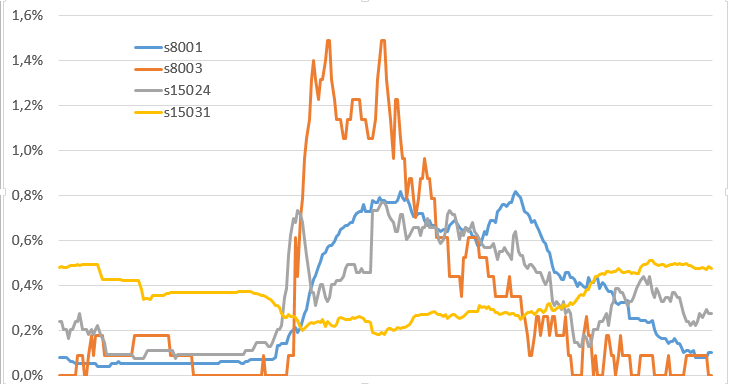

In [29]:
from pyquickhelper.helpgen import NbImage
NbImage("images/tb8_dis_hor.png")

## Exercice 5 : zones de travail

On souhaite déterminer si une station se situe plutôt dans une zone de travail ou plutôt dans une zone de résidence. On part de l'hypothèse que, dans une zone de travail, les gens arrivent en vélib et repartent en vélib. C'est sans doute le cas de la station 8003. Les vélos seront plutôt disponibles dans la journée. A l'opposé, dans une zone de résidence, les vélos seront disponibles plutôt la nuit. Comment faire à partir de la distribution des vélos disponibles construite à la question précédente ?

On considère que la plage diurne s'étend de 10h à 16h. Vous trouverez une illustration du résultat dans cet [article](http://www.xavierdupre.fr/blog/2013-09-26_nojs.html).


## Exercice 6 : lattitude, longitude

On repart de la requête précédente pour effectuer un JOIN avec la table *stations* pour récupérer les coordonnées (lat, long). Après un copier/coller dans Excel, on peut situer les zones de travail sur la région parisienne. 

In [32]:
%SQL_close

## Sans %%SQL

La commande magique ``%%SQL`` s'appuie sur le module [sqlite3](https://docs.python.org/3/library/sqlite3.html). On peut faire sans.

In [33]:
import sqlite3
conn = sqlite3.connect("td8_velib.db3")       # on ouvre une connexion sur la base de données
data = conn.execute("SELECT * FROM stations") # on exécute une requête SQL
for i, d in enumerate(data):                  # on affiche le résultat
    print(d)
    if i > 5:
        break
conn.close()

('QUAI ANATOLE FRANCE - PONT SOLFERINO - 75007 PARIS', 'Paris', 48.86138, 2.32442, '00901 - PORT SOLFÉRINO (STATION MOBILE)', 901)
("FETE DE L'OH (BERCY) - QUAI MAURIAC ANG PONT DE BERCY - 75013 PARIS", 'Paris', 48.8371336894515, 2.37434055460561, '00903 - QUAI MAURIAC  / PONT DE BERCY', 903)
('ECOLE MILITAIRE-AVENUE DE LA MOTTE PICQUET - 75007 PARIS', 'Paris', 48.85213620522547, 2.301961227213259, '00904 - PLACE JOFFRE / ECOLE MILITAIRE', 904)
("QUAI D'ORSAY - CONCORDE - 75007 PARIS", 'Paris', 48.86314, 2.31669, '00905 - CONCORDE/BERGES DE SEINE (STATION MOBILE)', 905)
("GARDE DE L'EST-PARVIS GARE DE L'EST - 75010 PARIS", 'Paris', 48.876419813641114, 2.358630064544601, "00906 - GARE DE L'EST", 906)
("QUAI D'ORSAY - PORT DU GROS CAILLOU - 75007 PARIS", 'Paris', 48.86288, 2.30652, '00908 - PORT DU GROS CAILLOU (STATION MOBILE)', 908)
("41 QUAI DE L'HORLOGE - 75001 PARIS", 'Paris', 48.857091635218225, 2.341747995157864, '01001 - ILE DE LA CITE PONT NEUF', 1001)
